# Getting Started with *pyFTracks* v 1.0

**Romain Beucher, Roderick Brown, Louis Moresi and Fabian Kohlmann**

The Australian National University
The University of Glasgow
Lithodat

*pyFTracks* is a Python package that can be used to predict Fission Track ages and Track lengths distributions for some given thermal-histories and kinetic parameters.

*pyFTracks* is an open-source project licensed under the MiT license. See LICENSE.md for details.

The functionalities provided are similar to Richard Ketcham's HeFTy sofware. 
The main advantage comes from its Python interface which allows users to easily integrate *pyFTracks* with other Python libraries and existing scientific applications.
*pyFTracks* is available on all major operating systems.


# Requirements

- Cython >= 0.29.14
- matplotlib >= 3.1.1
- scipy >= 1.3.2
- pandas >= 0.25.3
- numpy
- jupyter


# Installation

*pyFTracks* is availabe on pypi. The code should work on all major operating systems (Linux, MaxOSx and Windows)

`pip install pyFTracks`

You can also download the src from [Github](https://github.com/underworldcode/pyFTracks) and install using:

`python setup.py`

# Importing *pyFTracks*

The recommended way to import pyFTracks is to run:

In [1]:
import pyFTracks as FT

# Input

## Specifying a Thermal history

In [2]:
thermal_history = FT.ThermalHistory(name="My Thermal History",
                  time=[0., 43., 44., 100.],
                  temperature=[283., 283., 403., 403.])

In [3]:
import matplotlib.pyplot as plt

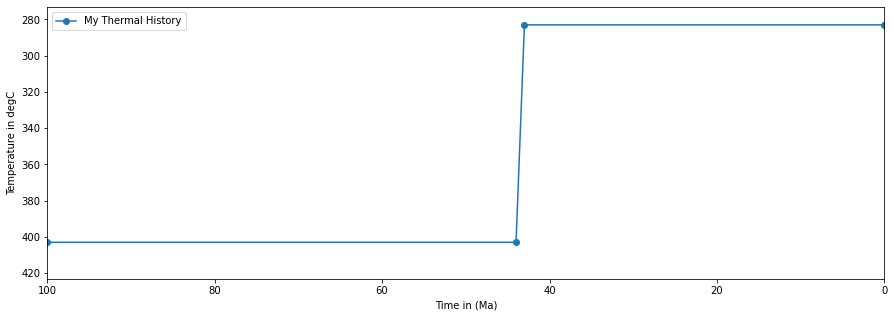

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(thermal_history.input_time, thermal_history.input_temperature, label=thermal_history.name, marker="o")
plt.xlim(100., 0.)
plt.ylim(150. + 273.15, 0.+273.15)
plt.ylabel("Temperature in degC")
plt.xlabel("Time in (Ma)")
plt.legend()

## Predefined thermal histories

We provide predefined thermal histories for convenience.

In [5]:
from pyFTracks.thermal_history import WOLF1, WOLF2, WOLF3, WOLF4, WOLF5, FLAXMANS1, VROLIJ

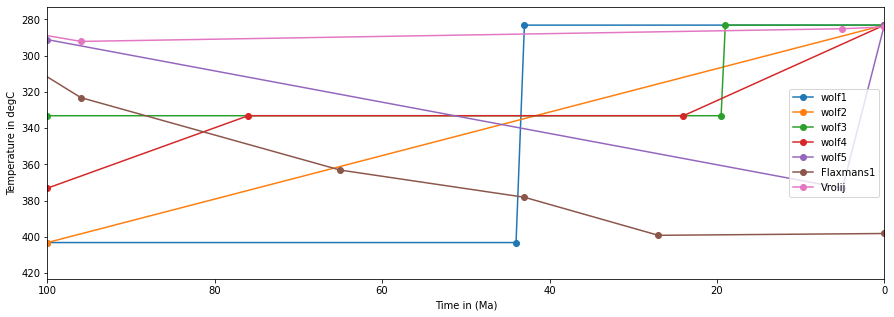

In [6]:
thermal_histories = [WOLF1, WOLF2, WOLF3, WOLF4, WOLF5, FLAXMANS1, VROLIJ]

plt.figure(figsize=(15, 5))
for thermal_history in thermal_histories:
    plt.plot(thermal_history.input_time, thermal_history.input_temperature, label=thermal_history.name, marker="o")
plt.xlim(100., 0.)
plt.ylim(150. + 273.15, 0.+273.15)
plt.ylabel("Temperature in degC")
plt.xlabel("Time in (Ma)")
plt.legend()    

# Samples / Dataset

The Sample class can be used to store the spontaneous and induced counts of tracks in a sample.
It can also records metadata such as zeta value, standard information and other sample information.

In [7]:
from pyFTracks import Sample

In [8]:
sample = Sample(data={"Ns":[0, 2, 18], 
                      "Ni": [11, 11, 28], 
                      "A": [24, 44, 32]}, 
                zeta=380.0, 
                zeta_error=5.0 / 380.,
                rhod=1.257,
                nd=8188)

In [9]:
sample.calculate_ages()

{'Ages': [0.0, 43.28, 151.73], 'Ages Errors': [0.0, 33.28, 45.91]}

In [10]:
sample

,Ns,Ni,A,Ages,Ages Errors
0,0,11,24,0.00,0.00
1,2,11,44,43.28,33.28
2,18,28,32,151.73,45.91


The user can also pass a panda dataframe to the *Sample* class

In [11]:
import pandas as pd

data = pd.DataFrame(columns=["Ns", "Ni", "A"])
data.loc["Grain1"] = {"Ns":0, "Ni": 11, "A": 24}

sample = Sample(data=data, zeta=380.0, 
                zeta_error=5.0 / 380.,
                rhod=1.257,
                nd=8188)

## Included datasets

*pyFTracks* comes with some sample datasets that can be used for testing and designing general code.

In [12]:
from pyFTracks.ressources import Gleadow
from pyFTracks.ressources import Miller

In [13]:
Gleadow

,Ns,Ni,A
0,31,41,40
1,19,22,20
2,56,63,60
3,67,71,80
4,88,90,90
5,6,7,15
6,18,14,20
7,40,41,40
8,36,49,40
9,54,79,60


In [14]:
Miller

,Ns,Ni,A
0,31,41,40
1,19,22,20
2,56,63,60
3,67,71,80
4,88,90,90
5,6,7,15
6,18,14,20
7,40,41,40
8,36,49,40
9,54,79,60


## Forward Model Components

The forward model takes a thermal history as input and the composition of some apatite population to predict an estimated fission track age and track length distribution.

# Annealing Models

*pyFTracks* implements annealing models from Ketcham et al, 1999 and Ketcham et al, 2007 for the Apatite Fission Track system. The implementation follows the procedure describe in Ketcham et al, 2000 wich was implemented by Richard Ketcham's AFTSolve and Hefty softwares. 

The Ketcham 1999 model has been developed using laboratory annealing experiments from Carlson et al, 1999.
It establishes an empirical relationship between the composition of apatites and their annealing behavior.
The equation is used to extrapolate the observed behaviour over geological timescales.

In [15]:
annealing_model = FT.Ketcham1999(kinetic_parameters={"ETCH_PIT_LENGTH": 1.65})
annealing_model.history = WOLF1

In [16]:
annealing_model.calculate_age()

(43.86666666666666, 44.7071253972019, 0.49211061290451286)

In [17]:
annealing_model = FT.Ketcham2007(kinetic_parameters={"ETCH_PIT_LENGTH": 1.65})
annealing_model.history = WOLF1

In [18]:
annealing_model.calculate_age()

(43.79999999999999, 44.4149163734945, 0.4812509911789736)

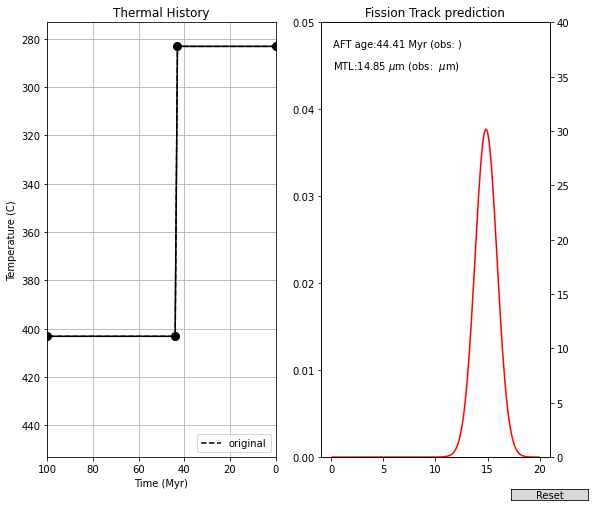

In [19]:
FT.Viewer(history=WOLF1, annealing_model=annealing_model)

# Index Temperatures in Fission Track Annealing

### Closure Temperature ($T_c$) (Dodson, 1973, 1979):

Defined as the temperature of the sample at the time given by its apparent age.
Most geochronological system have a high-temperature state at which the daughter product cannot accumulate, and a low temperature at which the daughter product is fully retained. Between those temperature, the daughter product is partially annealed. In the case of the Fission track system the density of tracks can decrease leading to a younger apparent age. The **Closure Temperature** is somewhere within that partial annealing zone. 

### Total Annealing Temperature ($T_A$)  (Issler 1996)

Defined as the temperature at which a fission-track population formed at an arbitrary low temperature fully anneals for a given heating rate. $T_A$ is also the temperature at the time of the formation of the oldest remaining track during an episode of linear cooling at a constant rate from a high temperature above which all tracks are annealed.

### Temperature of 100% fission track fading ($T_f$)

Defined as temperature at which fission-track density falls to zero. Traditionally it has been interpreted as the constant temperature necessary to anneal all fission tracks after a fix amount of time. ($T_f$) is approximated as the temperature required to anneal the reduced mean trak length to a value of 0.41 for a given amount of time.

In [20]:
cooling_100C_per_myr = FT.ThermalHistory(name="100C per Myr Cooling",
                  time=[0., 2.],
                  temperature=[293.15, 493.15])

cooling_10C_per_myr = FT.ThermalHistory(name="10C per Myr Cooling",
                  time=[0., 20.],
                  temperature=[293.15, 493.15])

cooling_1C_per_myr = FT.ThermalHistory(name="1C per Myr Cooling",
                  time=[0., 200.],
                  temperature=[293.15, 493.15])

In [21]:
models_parameters = { 
          "RN":{"c0": -31.517, "c1": 0.0012879, "c2": -34.001, "c3": 0., "a": -0.49032, "b": -7.8453},
          "DR":{"c0": -23.308, "c1": 0.00088138, "c2": -24.752, "c3": 0.00044680, "a": -0.41011, "b": -8.2670},
          "B3":{"c0": -10.789, "c1": 0.00046806, "c2": -9.3701, "c3": 0.00098792, "a": -0.16846, "b": -18.246},
         }

In [22]:
import pandas as pd

In [23]:
annealing_models_carlson_1999 = pd.DataFrame(columns=["c0", "c1", "c2", "c3", "a", "b"])

In [24]:
annealing_models_carlson_1999.append(pd.Series(data = {"c0": -31.517, "c1": 0.0012879, "c2": -34.001, "c3": 0., "a": -0.49032, "b": -7.8453}, name="RN"))

,c0,c1,c2,c3,a,b
RN,-31.517,0.001288,-34.001,0.0,-0.49032,-7.8453


In [25]:
annealing_models_carlson_1999

,c0,c1,c2,c3,a,b


In [26]:
histories = [cooling_1C_per_myr, cooling_10C_per_myr, cooling_100C_per_myr]

In [27]:
for key, model_parameters in models_parameters.items():
    model = FT.FanningLinear(model_parameters=model_parameters)   
    for history in histories:
        model.history = history
        model.calculate_age()
        TA = model.history.get_temperature_at_time(model.oldest_age) - 273.15
        print(f"TA: {TA}C")

TA: 116.0C
TA: 130.00000000000034C
TA: 143.99999999999994C
TA: 140.0C
TA: 152.00000000000023C
TA: 167.99999999999994C
TA: 186.0C
TA: 200.00000000000006C
TA: 216.0C


## Geological Benchmarks

### High Temperature Benchmark

We use the results from the Otway Basin published by Gleadow and Duddy in 1981. The thermal history of the Flaxmans well has been established using basin analysis and complemetary low temperature data.
The Flaxmans history is available in *pyFTracks* and can be loaded as follow:

In [29]:
from pyFTracks.thermal_history import FLAXMANS1

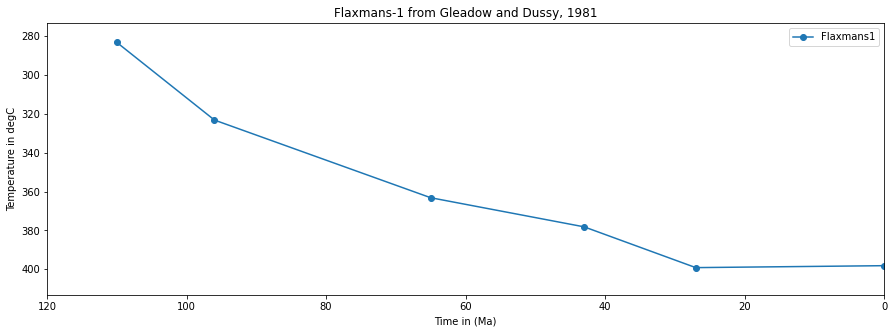

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(FLAXMANS1.input_time, FLAXMANS1.input_temperature, label=FLAXMANS1.name, marker="o")
plt.xlim(120., 0.)
plt.ylim(140. + 273.15, 0.+273.15)
plt.ylabel("Temperature in degC")
plt.xlabel("Time in (Ma)")
plt.title("Flaxmans-1 from Gleadow and Dussy, 1981")
plt.legend()    

In [31]:
FLAXMANS1.get_temperature_at_time(0.) - 273.15

125.0

Green et al. (1989b) showed that end-member F-apatites in that well become fully annealed at a current down-hole temperature of 92 °C.

In [32]:
track_lengths = annealing_model.generate_synthetic_lengths(100)

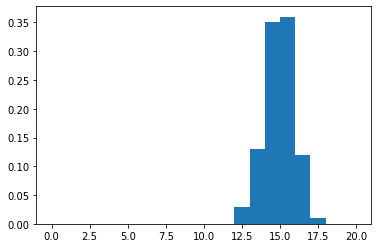

In [33]:
n, bins, patch = plt.hist(track_lengths, bins=range(0,21), density=True)

In [34]:
wolf1_synthetic_sample = annealing_model.generate_synthetic_sample()

In [35]:
wolf1_synthetic_sample.track_lengths

array([13.55, 15.15, 13.95, 14.05, 15.75, 13.25, 15.45, 17.05, 14.55,
       14.95, 16.55, 15.85, 14.55, 13.95, 14.15, 15.85, 14.75, 14.05,
       16.85, 14.75, 15.45, 16.75, 14.85, 13.85, 14.25, 15.15, 15.05,
       14.75, 14.35, 15.15, 13.55, 12.45, 14.95, 16.15, 15.05, 14.95,
       14.95, 15.65, 16.45, 16.35, 15.35, 14.45, 13.65, 14.85, 12.95,
       17.05, 14.55, 15.95, 14.25, 15.45, 15.15, 13.95, 13.65, 14.65,
       14.15, 14.85, 16.55, 13.85, 15.15, 14.45, 12.85, 14.75, 15.85,
       15.95, 14.85, 15.05, 13.65, 13.95, 14.25, 15.15, 13.55, 13.85,
       15.25, 15.85, 16.95, 17.05, 15.95, 14.35, 14.05, 13.55, 13.25,
       13.95, 17.15, 16.65, 15.35, 15.15, 14.65, 14.05, 16.45, 15.65,
       15.55, 14.75, 16.45, 15.05, 15.05, 12.65, 15.55, 14.15,  9.85,
       16.25])

In [36]:
wolf1_synthetic_sample.save("test.h5")

# Simple Fission-Track data Predictions

In [37]:
Ns = [31, 19, 56, 67, 88, 6, 18, 40, 36, 54, 35, 52, 51, 47, 27, 36, 64, 68, 61, 30]
Ni = [41, 22, 63, 71, 90, 7, 14, 41, 49, 79, 52, 76, 74, 66, 39, 44, 86, 90, 91, 41]

zeta = 350.
zeta_err = 10. / 350.
rhod = 1.304
rhod_err = 0.
Nd = 2936

In [38]:
FT.central_age(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Central': 175.57, 'se': 8.51, 'sigma': 0.0}

In [39]:
FT.pooled_age(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Pooled Age': 175.57, 'se': 9.88}

In [40]:
FT.single_grain_ages(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Age(s)': array([170.27, 194.13, 199.72, 211.83, 219.35, 192.69, 286.92, 218.88,
        165.51, 154.13, 151.79, 154.28, 155.39, 160.49, 156.08, 184.06,
        167.62, 170.15, 151.18, 164.85]),
 'se(s)': array([ 40.94,  61.16,  37.3 ,  36.79,  33.72, 107.4 , 102.71,  49.21,
         36.77,  27.71,  33.59,  28.26,  28.77,  31.11,  39.43,  41.83,
         28.25,  27.95,  25.54,  40.  ])}

In [41]:
FT.chi2_test(Ns, Ni)

0.9292129985459694